#Agenda




###1.   Motivación

###2.   Audiencia

###3.   Definición del objetivo

###4.   Contexto Comercial

###5.   Problema Comercial

###6.   Contexto Analítico

###7.   Hipótesis del Problema Analítico

###8.   Exploratory Data Analytics (EDA)

###9.   Análisis Univariado y Bivariado










#1 - Motivación


El presente proyecto tratará el tema de la diabetes, enfermedad crónica que afecta la capacidad del cuerpo de producir o utilizar insulina, lo que lleva a elevados niveles de glucosa en sangre. Es una enfermedad que afecta a uno de cada diez argentinos, con el agravante de que cuatro de cada diez desconocen su condición (fuente: Argentina.gob.ar), y a 442 millones de personas en el mundo aproximadamente, situación que se agrava con el pasar de los años y se prevé que esta tendencia continúe, dándole carácter de pandemia global.

Dado que es imperativo poder sacar conclusiones rápidamente en relación a esta enfermedad, es que se ha decidido hacer análisis sobre un dataset, cuya fuente es Kaggle.com, que contiene diferentes parámetros (si una persona en cuestión es fumadora, sedentaria, qué tan buena es su salud mental, etc.). La idea es poder observar si estos parámetros están relacionados con esta enfermedad y, de ser el caso, cuáles tienen mayor impacto, de modo de poder sacar conclusiones y tomar un curso de acción determinado.

En este desafío se realizarán análisis univariados, para entender las variables que resulten interesantes de manera individual, análisis bivariado, para entender relaciones entre pares de variables y poder visualizar patrones entre las mismas y análisis multivariado, para visualizar relaciones entre tres variables o más. También se realizarán cálculos adicionales, como tratamiento de valores nulos, si es que fuera pertinente.

La conclusión a la que se pretende arribar es detectar si, efectivamente, algunas de las variables de las que se sospecha están relacionadas con la diabete o descartar la idea, si es que en los diferentes análisis no se observaran patrones que indiquen algún tipo de correspondencia.

#2 - Audiencia

Las audiencias potenciales del presente trabajo pueden ser:


*   Médicos y otros profesionales de la salud podrían estar interesados en los resultados del presente trabajo.
*   Organizaciones gubernamentales de carácter nacional e internacional, cuyo foco es la salud.
*   Prensa especializada en salud y prensa en general, en menor medida.







#3 - Definición del objetivo

El objetivo de este trabajo es, principalmente, detectar una potencial diabetes en los individuos estudiados. Como se mencionó anteriormente, hay un gran porcentaje de personas que viven con esta enfermedad sin saberlo (40% de personas en Argentina), por lo que sería útil hacer uso de la ciencia de datos (y sus algoritmos altamente probados) y la gran capacidad de cómputo actual para detectar esta enfermedad de manera rápida y eficaz.
Por otro lado, sería útil verificar qué variables impactan más en la enfermedad, de manera de hacer hincapié en ellas, ya sea para mitigar los síntomas, como para prevenir dicha enfermedad.

#4 - Contexto Comercial

Dado el gran impacto de la diabetes en la salud pública, se pretende que este proyecto esté alineado con los actores mencionados anteriormente (médicos, organizaciones de la salud, prensa especializada, etc) de manera de abordar esta problemática global. Dada la audiencia a la que se apunta, es importante asegurarse que los resultados obtenidos estén respaldados por evidencia científica sólida.

#5 - Problema Comercial

El objetivo de este proyecto es dar formato a los datos dados y responder mediante visualizaciones y otras herramientas a preguntas como las siguientes, pero no se descarta agregar más preguntas a medida que surjan:



*   ¿Existe relación entre la salud física de una persona y la diabetes?
*   ¿Existe relación entre la salud mental de una persona y la diabetes?
*   ¿La edad es un factor importante en relación a la diabetes?
*   ¿La diabetes tiene mayor preponderancia según el sexo de una persona?
*   ¿El índice de masa corporal es un factor a considerar para determinar si una persona es diabética?
*   ¿La presión arterial es un factor relevante en relación a la diabetes?







#6 - Contexto Analítico

Utilizando información sobre una gran variedad de personas, que pueden o no tener diabetes, así como de diversos factores de índole médico, se procurará dar respuestas a las interrogantes mencionadas anteriormente, así como las hipótesis que se plantean a continuación:

#7 - Hipótesis del Problema Analítico

###A)
H0: una persona con salud física promedio (o mejor) tiene IMC límite (25).

H1: una persona con salud física promedio (o mejor)tiene IMC menor del límite.

###B)

H0: una persona de 50 años ó más tiene tendencia a la diabetes.

H1: una persona de 50 años ó más no tiene tendencia a la diabetes.

Se irán agregando más hipótesis a medida que el proyecto avance. Con dichas hipótesis se intenta determinar si algunos factores presentes en las hojas de datos tienen peso o no a la hora de determinar si un sujeto potencialmente puede llegar a desarrollar diabetes.


#8 - Exploratory Data Analytics (EDA)

In [1]:
#Importo las librerías.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Abro el archivo CSV en un dataframe.

ruta_diabetes = '/content/gdrive/MyDrive/PreEntrega_3_DS/Dataset_IndicadoresDiabetes.csv'
dfdiabetes = pd.read_csv(ruta_diabetes)

In [4]:
#Imprimo las primeras cinco filas del dataframe.

print(dfdiabetes.head())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

In [5]:
#Observo los tipos de variables

dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
#El dataset posee muchas columnas floats que deben convertirse a categóricas

Vector_Columnas = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
dfdiabetes[Vector_Columnas] = dfdiabetes[Vector_Columnas].astype('category')
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   Diabetes              253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

In [7]:
#Observo las métricas de las columnas numéricas

dfdiabetes.describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


In [8]:
#Observamos si hay datos nulos en el dataset y si existen valores duplicados.

dfdiabetes.isnull().sum()

Duplicados = dfdiabetes[dfdiabetes.duplicated()]

#print(Duplicados)

dfdiabetes = dfdiabetes.drop_duplicates()

print(dfdiabetes)

       HeartDiseaseorAttack HighBP HighChol CholCheck   BMI Smoker Stroke  \
0                       0.0    1.0      1.0       1.0  40.0    1.0    0.0   
1                       0.0    0.0      0.0       0.0  25.0    1.0    0.0   
2                       0.0    1.0      1.0       1.0  28.0    0.0    0.0   
3                       0.0    1.0      0.0       1.0  27.0    0.0    0.0   
4                       0.0    1.0      1.0       1.0  24.0    0.0    0.0   
...                     ...    ...      ...       ...   ...    ...    ...   
253675                  0.0    1.0      1.0       1.0  45.0    0.0    0.0   
253676                  0.0    1.0      1.0       1.0  18.0    0.0    0.0   
253677                  0.0    0.0      0.0       1.0  28.0    0.0    0.0   
253678                  0.0    1.0      0.0       1.0  23.0    0.0    0.0   
253679                  1.0    1.0      1.0       1.0  25.0    0.0    0.0   

       Diabetes PhysActivity Fruits  ... AnyHealthcare NoDocbcCost GenHlth 

#9 - Análisis Variado y Bivariado

Análisis univariado

La intención en esta sección es representar gráficamente las variables individualmente para sacar conclusiones. En el caso particular de este dataset, para observar cómo están distribuidos los datos en algunas de las variables que considero pertinentes y que pueden tener impacto en la enfermedad tratada en este trabajo.

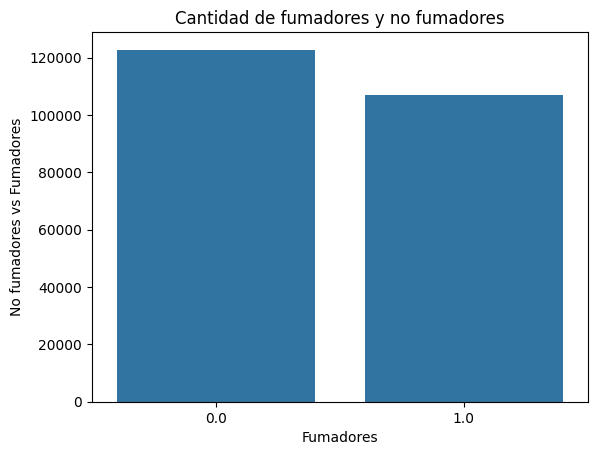

In [9]:
#Grafico la población de fumadores y no fumadores

sns.countplot(data = dfdiabetes, x = 'Smoker')

#Agrego el título

plt.title('Cantidad de fumadores y no fumadores')

#Coloco el nombre a los ejes

plt.xlabel('Fumadores')
plt.ylabel('No fumadores vs Fumadores')

#Muestro el gráfico, las referencias son: 1:  Fumador, 2: No fumador

plt.show()

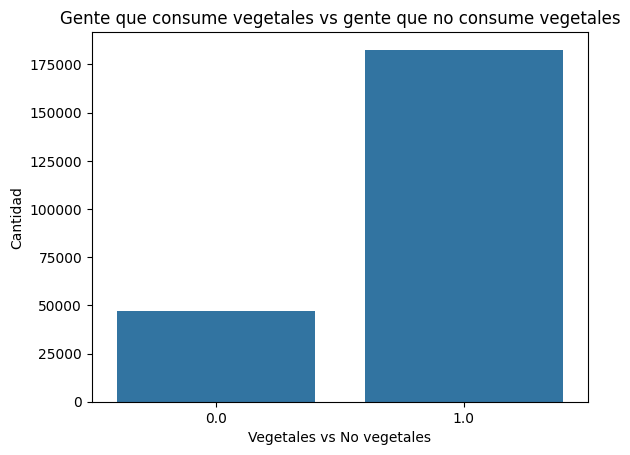

In [10]:
#Grafico la cantidad de gente que consume vegetales al menos una vez por día

sns.countplot(data = dfdiabetes, x = 'Veggies')

#Agrego un título

plt.title('Gente que consume vegetales vs gente que no consume vegetales')

#Nombro los ejes

plt.xlabel('Vegetales vs No vegetales')
plt.ylabel('Cantidad')

#Muestro el gràfico, referencia: 0: No consume vegetales, 1: Consume vegetales

plt.show()

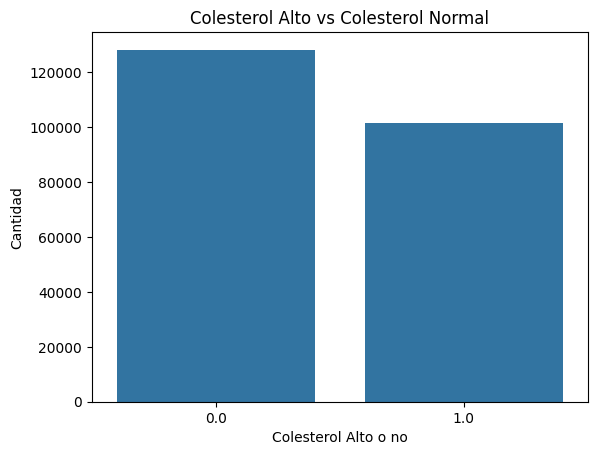

In [41]:
#Grafico la cantidad de gente con colesterol alto vs las que no.

sns.countplot(data = dfdiabetes, x = 'HighChol')

#Agrego un título

plt.title('Colesterol Alto vs Colesterol Normal' )

#Nombro los ejes

plt.xlabel('Colesterol Alto o no')
plt.ylabel('Cantidad')

#Muestro el gráfico, referencia: 0: Colesterol Alto, 1: Colesterol Bajo

plt.show()

In [12]:
#Creo una nueva columna en el dataframe, considerando que un IMC mayor a 25 significa sobrepeso

dfdiabetes['BMI Class'] = np.where(dfdiabetes['BMI'] > 25, 'Sobrepeso', 'Normal')

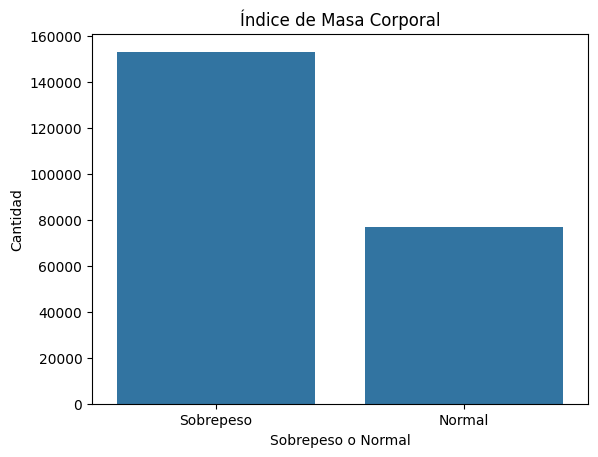

In [13]:
#Grafico ïndice de Masa Corporal

sns.countplot(data = dfdiabetes, x = 'BMI Class')

#Agrego un título

plt.title('Índice de Masa Corporal' )

#Nombro los ejes

plt.xlabel('Sobrepeso o Normal')
plt.ylabel('Cantidad')

#Muestro el gráfico

plt.show()

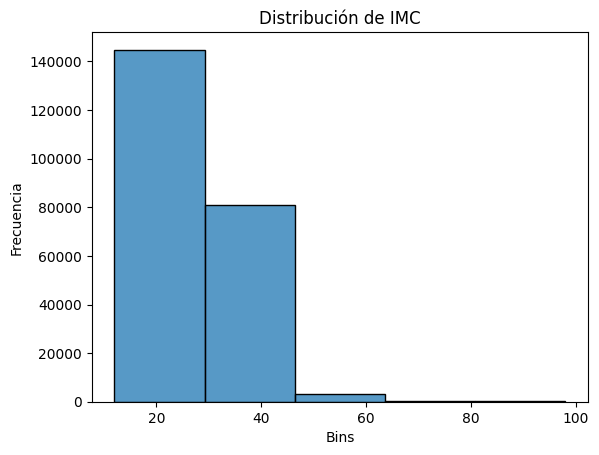

In [47]:
#Grafico un histograma para ver cómo están distribuidas las edades

sns.histplot(data =dfdiabetes, x = 'BMI', bins = 5)

#Agrego un título

plt.title('Distribución de IMC')

#Agrego los ejes

plt.xlabel('Bins')
plt.ylabel('Frecuencia')

plt.show()

Análisis bivariado

La intención en esta sección es graficar dos variables, con el objetivo de observar si existe alguna correlación entre las mismas. Dichas variables deberían ser pertinentes de analizar, de manera de sacar conclusiones y poder seguir un curso de acción.

In [15]:
#Tomo una muestra de dos mil filas, ya que con la totalidad de los datos se perdía legibilidad.

df_filtrado = dfdiabetes.head(2000)

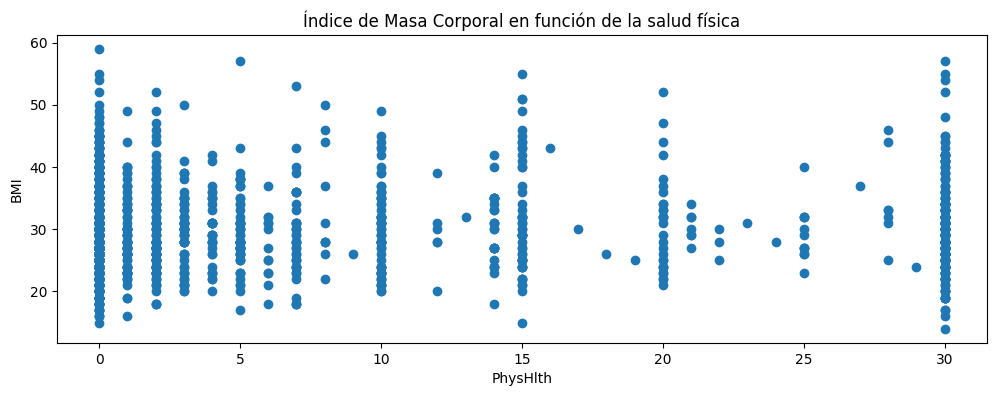

In [32]:
#Grafico Salud Física vs Índice de masa corporal, para ello utilizo un gráfico de dispersión.

VariableX = 'PhysHlth'
VariableY = 'BMI'

X = df_filtrado[VariableX]
Y = df_filtrado[VariableY]

#Escojo el tamaño de la figura.

figura, ejes = plt.subplots(figsize = (12,4))

ejes.scatter(X, Y)

#Seteo el título y los nombres de los ejes.

ejes.set_xlabel(f'{VariableX}')
ejes.set_ylabel(f'{VariableY}')
plt.title ('Índice de Masa Corporal en función de la salud física')

plt.show()

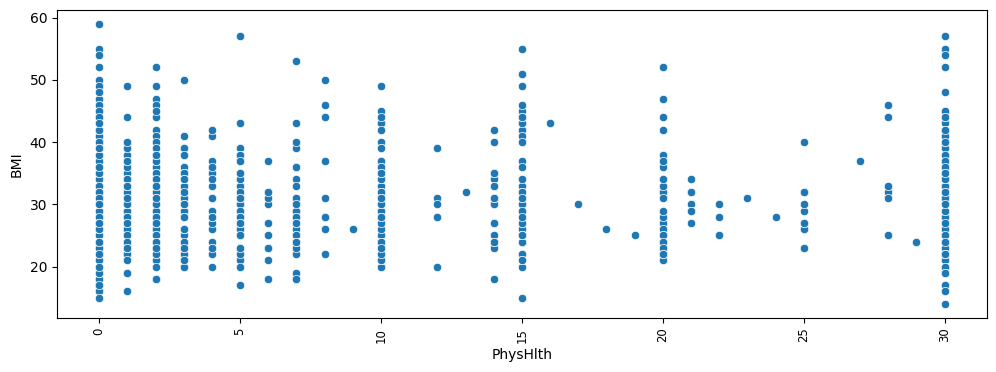

In [33]:
#Grafico nuevamente Salud Física vs Índice de Masa Corporal, pero esta vez utilizando la librería Seaborn.

plt.figure(figsize = (12,4))

sns.scatterplot(data = df_filtrado, x = 'PhysHlth', y = 'BMI')

plt.xticks(rotation=90, fontsize='small')

plt.show()

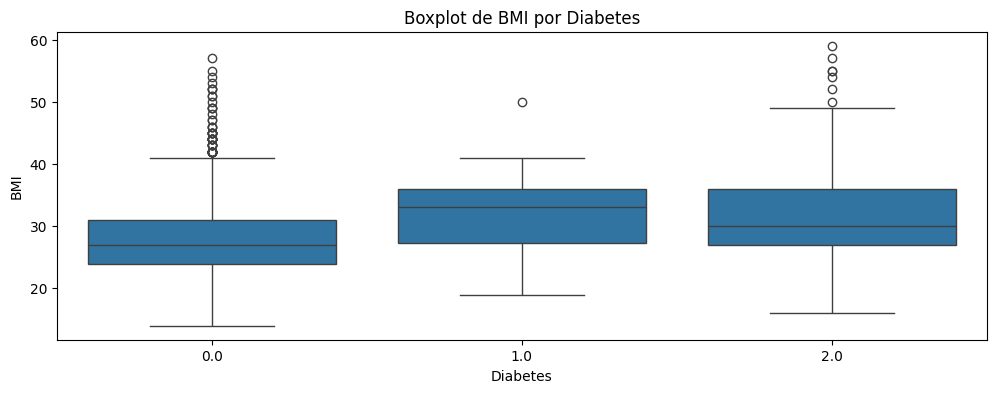

In [34]:
#Se grafica BMI vs Diabetes, se utiliza Seaborn y se representan los datos con un Boxplot.

plt.figure(figsize = (12,4))
sns.boxplot(data=df_filtrado, x='Diabetes', y='BMI')

#Coloco título y nombro los ejes

plt.title('Boxplot de BMI por Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')

#Muestro el gráfico

plt.show()

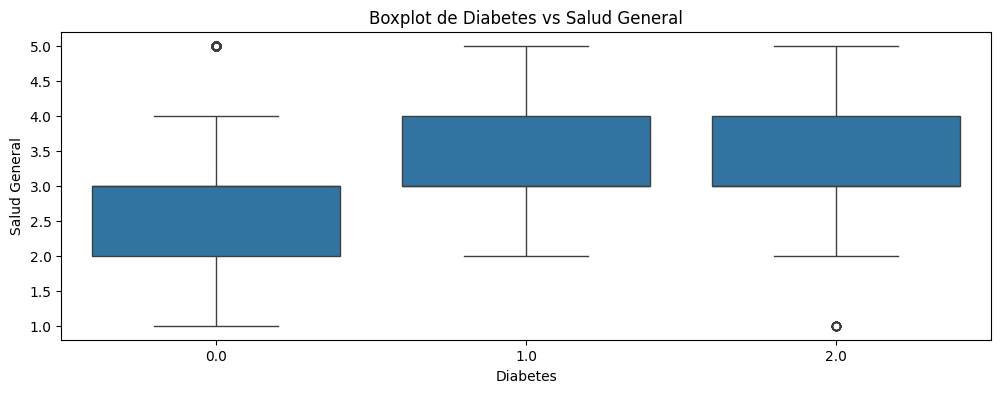

In [38]:
#Se grafica Salud General vs Diabetes, nuevamente se utiliza Seaborn y se representan los datos con un Boxplot.

plt.figure(figsize = (12,4))
sns.boxplot(data=df_filtrado, x='Diabetes', y='GenHlth')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Salud General')
plt.xlabel('Diabetes')
plt.ylabel('Salud General')

#Muestro el gráfico

plt.show()

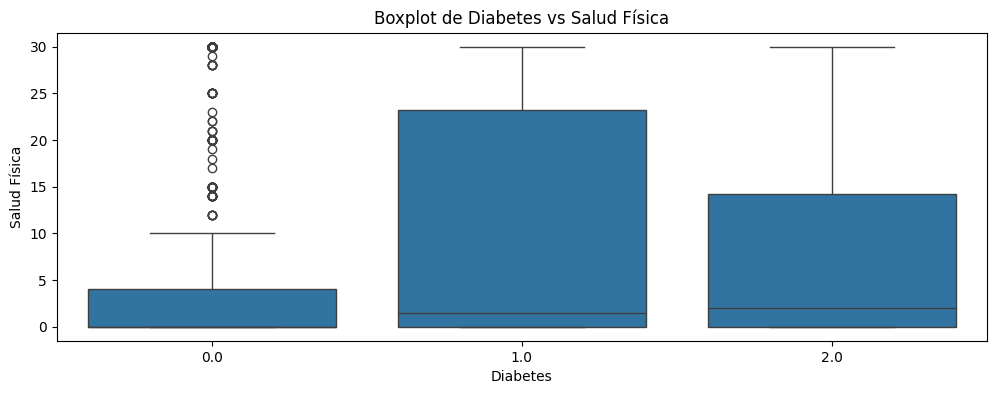

In [39]:
#Se grafica Salud Física vs Diabetes, nuevamente se utiliza Seaborn y se representan los datos con un Boxplot.

plt.figure(figsize = (12,4))
sns.boxplot(data=df_filtrado, x='Diabetes', y='PhysHlth')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Salud Física')
plt.xlabel('Diabetes')
plt.ylabel('Salud Física')

#Muestro el gráfico

plt.show()

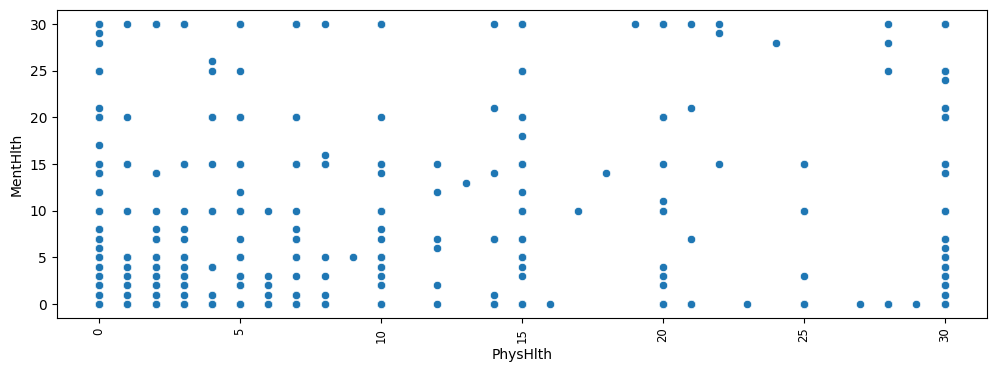

In [40]:
#Por curiosidad graficaré Salud Física vs Salud Mental, para ver si hay alguna relación entre ellas.

plt.figure(figsize = (12,4))

sns.scatterplot(data = df_filtrado, x = 'PhysHlth', y = 'MentHlth')

plt.xticks(rotation=90, fontsize='small')

plt.show()

In [ ]:
#Test de hipótesis 1: Quiero averiguar si una persona con salud física promedio o mejor tiene un IMC bajo o normal.

df_promedio = dfdiabetes[dfdiabetes['PhysHlth'] > 4.242081]

#Tomo IMC = 25, ya que se considera el límite entre el IMC normal y sobrepeso.

IMC_limite = 25

#df_promedio.head()

#H0: una persona con salud física promedio (o mejor) tiene IMC límite (25)
#H1: una persona con salud física promedio (o mejor)tiene IMC menor del límite

t_stat, p_valor = stats.ttest_1samp(a=df_promedio['BMI'], popmean=IMC_limite)

# Imprimo los resultados

print(f'El estadístico es: {t_stat}')
print(f'El p-valor es: {p_valor/2}')

#Con ese valor de p-valor, rechazo la hipótesis nula.

El estadístico es: 148.10122941848812
El p-valor es: 0.0


In [ ]:
#Test de hipótesis 2: Averiguar si la gente de edad mayor a 50 años tiene mayor tendencia a tener diabetes.

df_diab = dfdiabetes[dfdiabetes['Diabetes'] != 0]

#df_diab.head()

edad_adulta = 50

#H0: una persona de 50 años ó más tiene tendencia a la diabetes.
#H1: una persona de 50 años ó más no tiene tendencia a la diabetes.

t_stat, p_valor = stats.ttest_1samp(a = df_promedio['Age'], popmean = edad_adulta)

# Imprimo los resultados

print(f'El estadístico es: {t_stat}')
print(f'El p-valor es: {p_valor}')

#Con ese valor de p-valor, rechazo la hipótesis nula.

El estadístico es: -3413.6416727207343
El p-valor es: 0.0


In [ ]:
#Asignación de variables

X = dfdiabetes.drop('Diabetes', axis = 1)
#X = dfdiabetes.drop('BMI Class', axis = 1)
Y = dfdiabetes['Diabetes']

#Divido los datos en training y testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100, stratify = Y)

#Si bien el DecisionTreeClassifier no es sensible a la escala como los otros algoritmos de clasificación, escalo los datos
#tipo float para tener los datos en condiciones para los algoritmos restantes.


scaler = StandardScaler()

X_train_escalado = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_escalado = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))

X_train_escalado = pd.DataFrame(X_train_escalado, columns=X_train.select_dtypes(include=['int64', 'float64']).columns, index=X_train.index)
X_test_escalado = pd.DataFrame(X_test_escalado, columns=X_test.select_dtypes(include=['int64', 'float64']).columns, index=X_test.index)

#Update de datos

X_train.update(X_train_escalado)
X_test.update(X_test_escalado)

#Verifico si los datos de prueba están en los datos de entrenamiento.

X_train_flat = X_train.values.flatten()
X_test_flat = X_test.values.flatten()

intersection = set(X_train_flat) & set(X_test_flat)

print(intersection)

{0.0, 1.0, 0.3406630619499309, 0.45519224033601, -0.517038230332866, 1.0268536027226987, 1.0080727513820698, 2.2555012786614066, 2.7961222666514525, 3.442337975047365, 2.1435789599554713, 2.2439288504873995, 3.7281816149685265, 5.053732353106239, 8.146684075427565, 2.013703058446282, 0.05361082215063729, 8.58853432147347, 9.324951398216642, 10.208651890308449, 5.201015768454873, 5.937432845198046, -1.3213852470564968, 6.673849921941219, 7.410266998684392, 8.883101152170738, 2.5332066644830395, 2.0230514840217784, 0.03515518583118717, 0.06556453580844201, 3.0527102705197966, 1.0291033349264829, -0.6903208454905112, -2.9984510597285796, -0.24847059944460745, -0.02889787566593679, 3.433614784271257, 4.17003186101443, 1.9607806307849114, 1.802174117556157, -1.99212489411576, 6.379283091243949, 0.5308417867663535, 7.852117244730295, 7.115700167987122, 1.2243635540417386, 1.1045717478819568, -1.6445070899041367, 2.6971977075280846, -1.7213047529309533, 0.6173458100293432, 1.624075353918714, 

Accuracy: 0.9970987161819105


<Axes: >

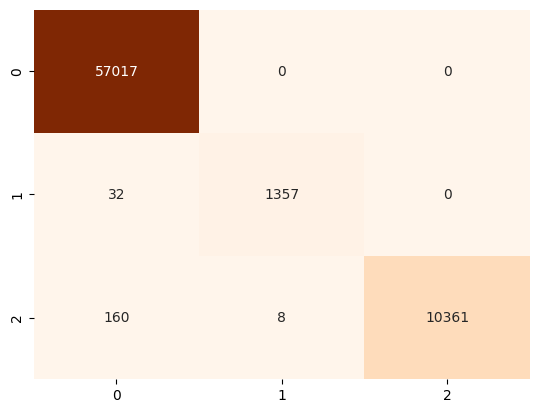

In [ ]:
#Uso DecisionTreeClassifier y entreno el modelo

DTC = DecisionTreeClassifier(random_state = 100)
DTC.fit(X_test, Y_test)

Y_pred = DTC.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
matriz_conf = confusion_matrix(Y_test, Y_pred)

# Imprimo los resultados

print(f"Accuracy: {accuracy}")

#Visualizo la matriz de confusión

sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Oranges', cbar=False)
